In [1]:
import pandas as pd
import seaborn as sns
data = pd.read_json('gamesEXT.json')
data.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0,True


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  int64  
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(2), int64(4), object(3)
memory usage: 4.1+ MB


<AxesSubplot:xlabel='price_final', ylabel='positive_ratio'>

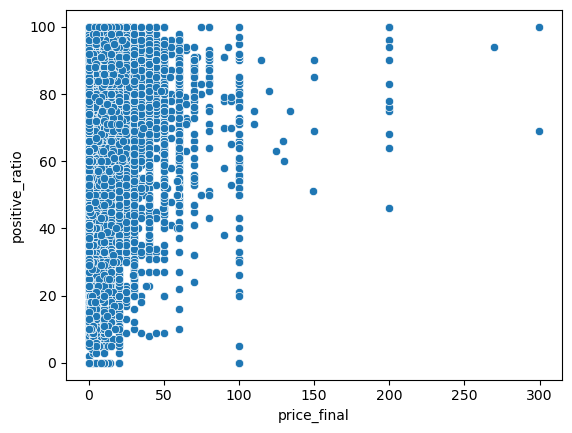

In [3]:
sns.scatterplot(data=data, x='price_final', y='positive_ratio' )

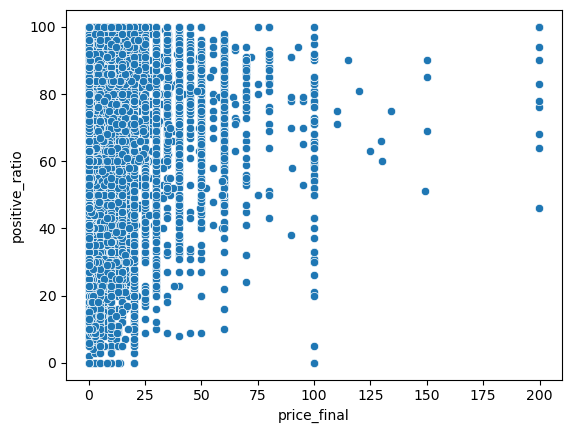

In [4]:
def drawScatter(data, x, y, num_outliers):
    idx = []
    for i in range(num_outliers):
        idx = data[x].idxmax()
        data.drop([idx], inplace=True)
        
    sns.scatterplot(data=data, x=x, y=y)
    
drawScatter(data, 'price_final', 'positive_ratio', 5)

In [7]:
def calc_corr(data, x, y, num_outliers):
    
    if num_outliers  > 0:
        for count in range(num_outliers):
            idx = data[data[x] == data[x].max()].index
            for i in idx:
                data.drop([i], inplace=True)
            idx = data[data[y] == data[y].max()].index
            for i in idx:
                data.drop([i], inplace=True)
                
    sub_data = data[[x, y]]
    return sub_data.corr(method="pearson")

calc_corr(data, 'positive_ratio', 'discount', 10)

,positive_ratio,discount
positive_ratio,1.000000,0.025448
discount,0.025448,1.000000
